<img src="https://www.talk-business.co.uk/wp-content/uploads/2015/09/bank_128318117.jpg" width="100%" height="300px">

# Data Glacier Data Science:: Bank Marketing (Campaign) -- Group Project
# Bank Marketing (Campaign)
 

Problem Statement:

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

 

Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

# Imports


In [1]:
#!pip install modin

In [2]:
import pandas as pd
# import modin.pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Validation

In [3]:
#from distributed import Client
#client = Client()

In [4]:
bank_df = pd.read_csv('Data/bank.csv', sep=';')
bank_full_df = pd.read_csv('Data/bank-full.csv', sep=';')
ba_df = pd.read_csv('Data/bank-additional.csv', sep=';')
baf_df = pd.read_csv('Data/bank-additional-full.csv', sep=';')

In [5]:
new_baf_df = baf_df.drop_duplicates()

In [6]:
bank_df.shape

(4521, 17)

In [7]:
if bank_df.shape[0] == 4521 and bank_df.shape[1] == 17:
  print('Bank dataframe validated')
else:
  print('Upload your file again')  

Bank dataframe validated


In [8]:
bank_full_df.shape

(45211, 17)

In [9]:
if bank_full_df.shape[0] == 45211 and bank_full_df.shape[1] == 17:
  print('Bank-Full dataframe validated')
else:
  print('Upload your file again') 

Bank-Full dataframe validated


In [10]:
ba_df.shape

(4119, 21)

In [11]:
if ba_df.shape[0] == 4119 and ba_df.shape[1] == 21:
  print('Bank-Additional dataframe validated')
else:
  print('Upload your file again') 

Bank-Additional dataframe validated


In [12]:
new_baf_df.shape

(41176, 21)

In [13]:
if new_baf_df.shape[0] == 41176 and new_baf_df.shape[1] == 21:
  print('Bank-Additional-Full dataframe validated')
else:
  print('Upload your file again') 

Bank-Additional-Full dataframe validated


# Data Exploration

In [14]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
bank_df.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1449,31,management,married,tertiary,no,1224,yes,yes,cellular,24,jul,1441,2,-1,0,unknown,yes
1826,40,technician,married,secondary,no,1819,no,no,cellular,5,jun,398,2,-1,0,unknown,no
3841,32,technician,married,secondary,no,5122,no,no,cellular,13,aug,31,1,-1,0,unknown,no
896,31,technician,single,secondary,yes,25,no,no,cellular,2,feb,381,1,-1,0,unknown,no
2683,33,housemaid,married,primary,no,212,yes,no,cellular,11,jul,260,2,-1,0,unknown,no
505,31,unemployed,married,secondary,no,296,yes,no,unknown,20,may,378,3,-1,0,unknown,no


In [16]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [17]:
bank_df.count() # number of rows

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

In [18]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [19]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Visualization

## Bank data exploration

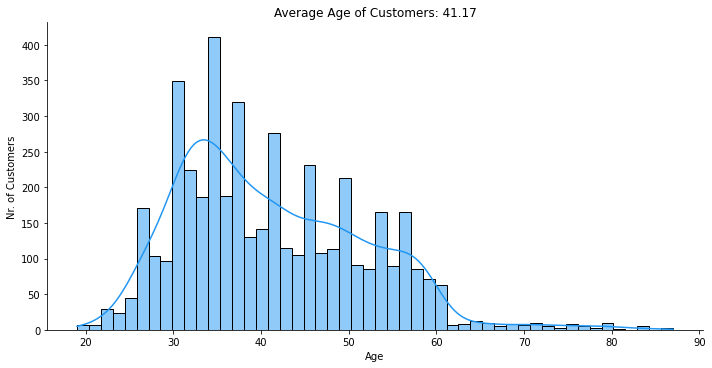

In [20]:
sns.displot(bank_df['age'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Average Age of Customers: {(bank_df.age.mean()):.4}')
plt.xlabel('Age')
plt.ylabel('Nr. of Customers')

plt.show()

In [21]:
# Job
bank_df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<AxesSubplot: >

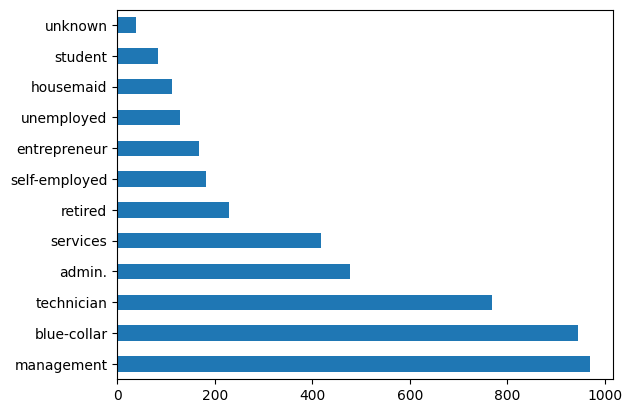

In [22]:
bank_df['job'].value_counts().plot(kind='barh')

In [23]:
# marital
bank_df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

<AxesSubplot: >

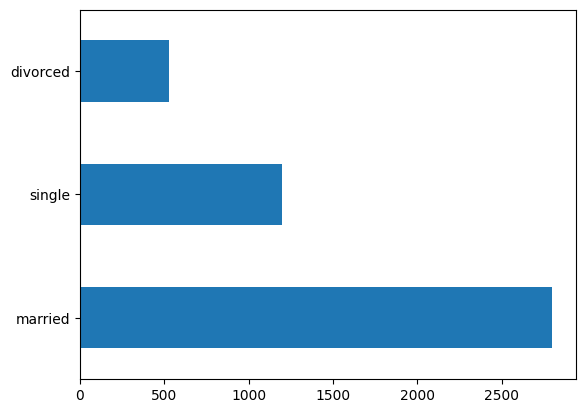

In [24]:
bank_df['marital'].value_counts().plot(kind='barh')

In [25]:
# education
bank_df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot: >

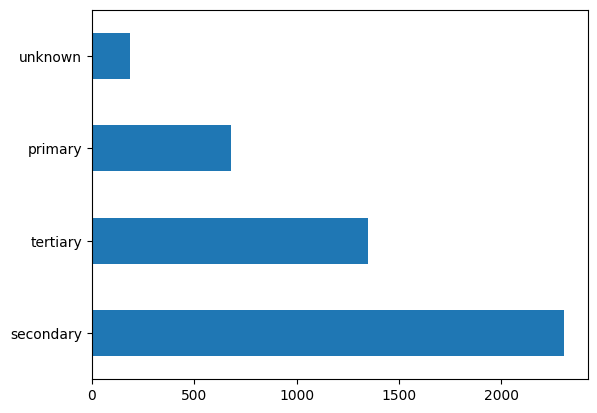

In [26]:
bank_df['education'].value_counts().plot(kind='barh')

In [27]:
# default: has credit in default?
bank_df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

<AxesSubplot: >

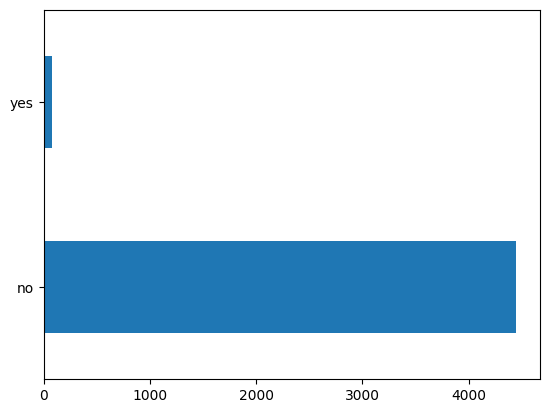

In [28]:
bank_df['default'].value_counts().plot(kind='barh')

In [29]:
# housing: has housing loan?
bank_df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

<AxesSubplot: >

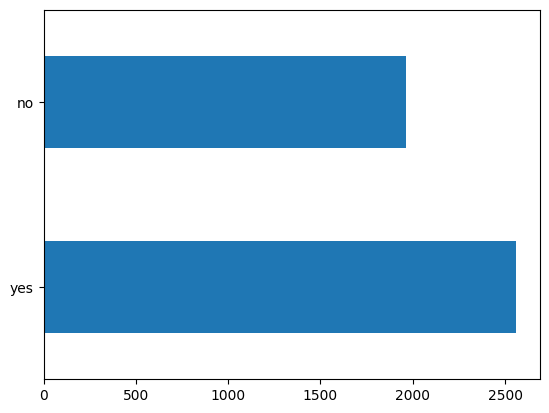

In [30]:
bank_df['housing'].value_counts().plot(kind='barh')

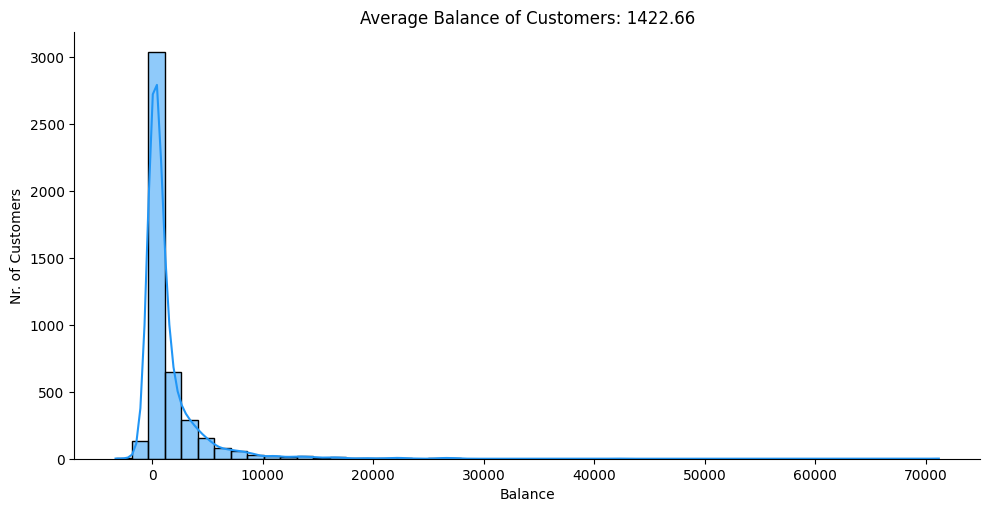

In [31]:
# balance: average yearly balance, in euros (numeric)
sns.displot(bank_df['balance'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f6')

plt.title(f'Average Balance of Customers: {(bank_df.balance.mean()):.6}')
plt.xlabel('Balance')
plt.ylabel('Nr. of Customers')

plt.show() 

In [32]:
# loan: has personal loan?
bank_df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [33]:
# contact: contact communication type (categorical)
bank_df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

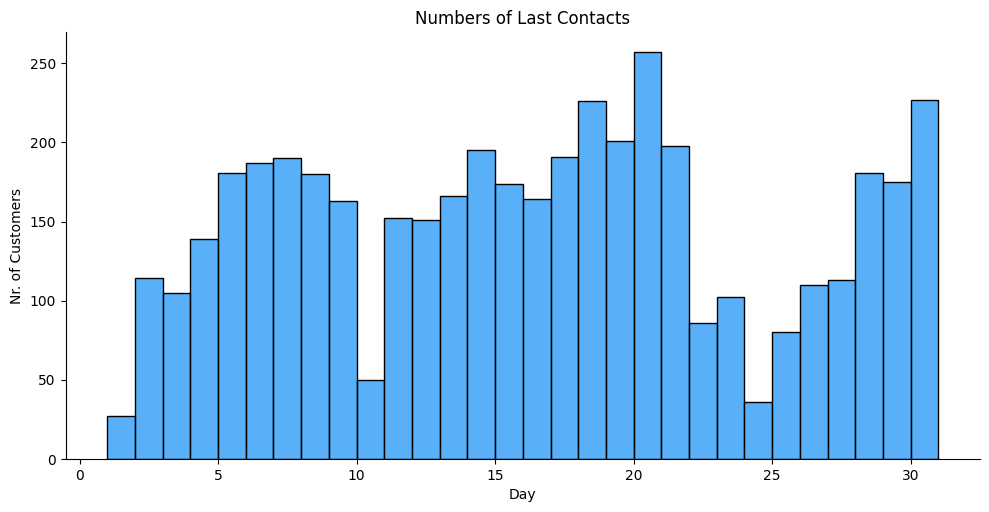

In [34]:
# day: last contact day of the month (numeric)
sns.displot(bank_df['day'], 
            bins=30, 
            aspect=2, 
            color='#2196f6')

plt.title(f'Numbers of Last Contacts')
plt.xlabel('Day')
plt.ylabel('Nr. of Customers')

plt.show() 

In [35]:
# month: last contact month of year (categorical)
bank_df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

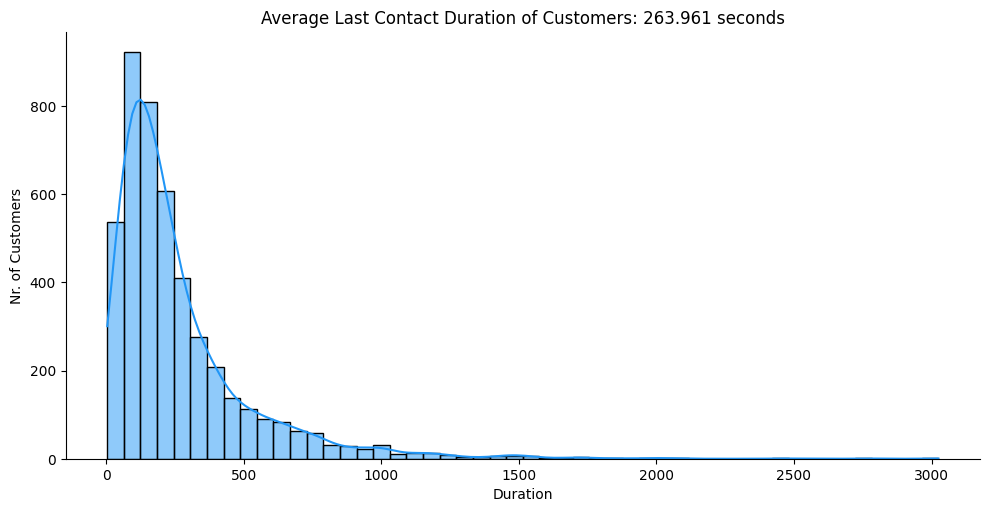

In [36]:
# duration: last contact duration, in seconds (numeric)
sns.displot(bank_df['duration'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f6')

plt.title(f'Average Last Contact Duration of Customers: {(bank_df.duration.mean()):.6} seconds')
plt.xlabel('Duration')
plt.ylabel('Nr. of Customers')

plt.show() 

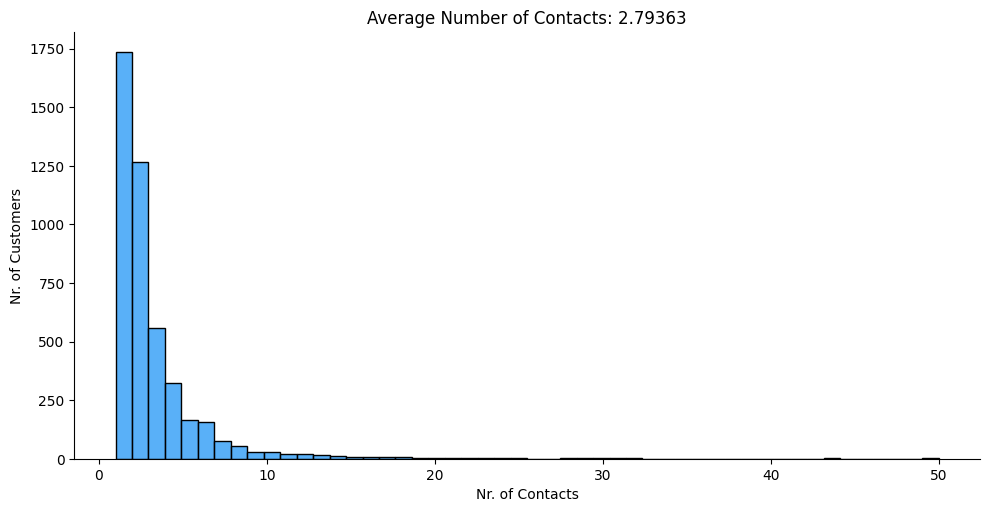

In [37]:
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
sns.displot(bank_df['campaign'], 
            bins=50, 
            aspect=2,
            color='#2196f6')

plt.title(f'Average Number of Contacts: {(bank_df.campaign.mean()):.6}')
plt.xlabel('Nr. of Contacts')
plt.ylabel('Nr. of Customers')

plt.show() 

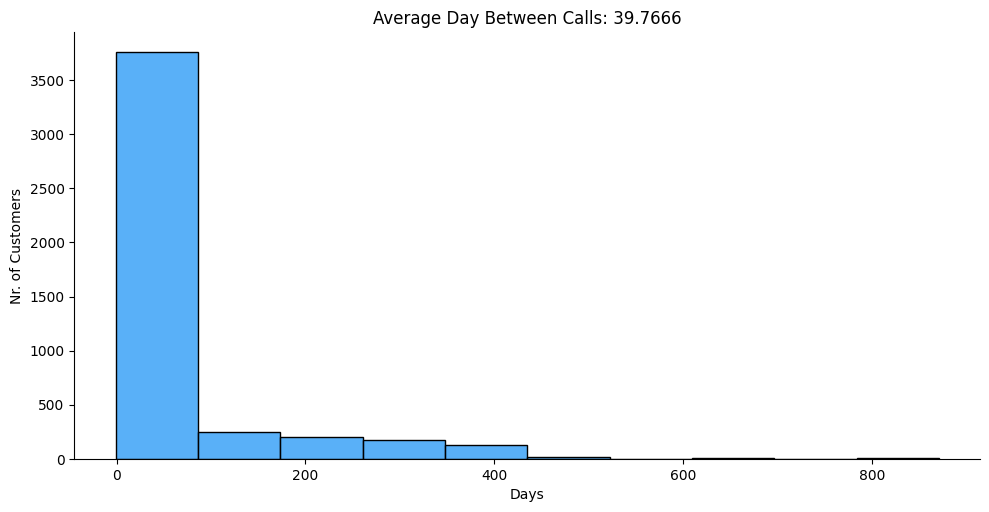

In [38]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
sns.displot(bank_df['pdays'], 
            bins=10, 
            aspect=2, 
            color='#2196f6')

plt.title(f'Average Day Between Calls: {(bank_df.pdays.mean()):.6}')
plt.xlabel('Days')
plt.ylabel('Nr. of Customers')

plt.show() 

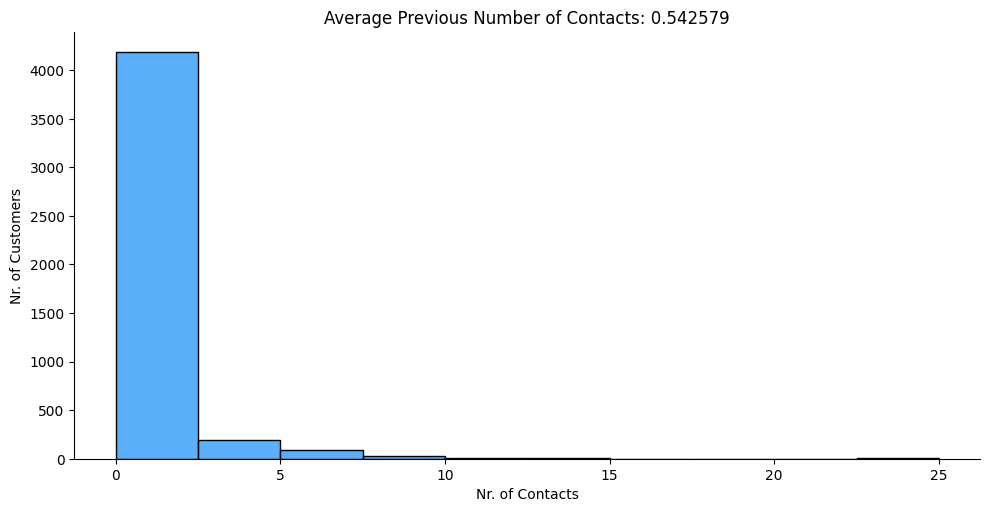

In [39]:
# previous: number of contacts performed before this campaign and for this client (numeric)
sns.displot(bank_df['previous'], 
            bins=10, 
            aspect=2, 
            color='#2196f6')

plt.title(f'Average Previous Number of Contacts: {(bank_df.previous.mean()):.6}')
plt.xlabel('Nr. of Contacts')
plt.ylabel('Nr. of Customers')

plt.show() 

In [40]:
# poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
bank_df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [41]:
#  Output variable (desired target): Has the client subscribed a term deposit?
bank_df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [42]:
dataset = bank_df[['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','poutcome','y']]

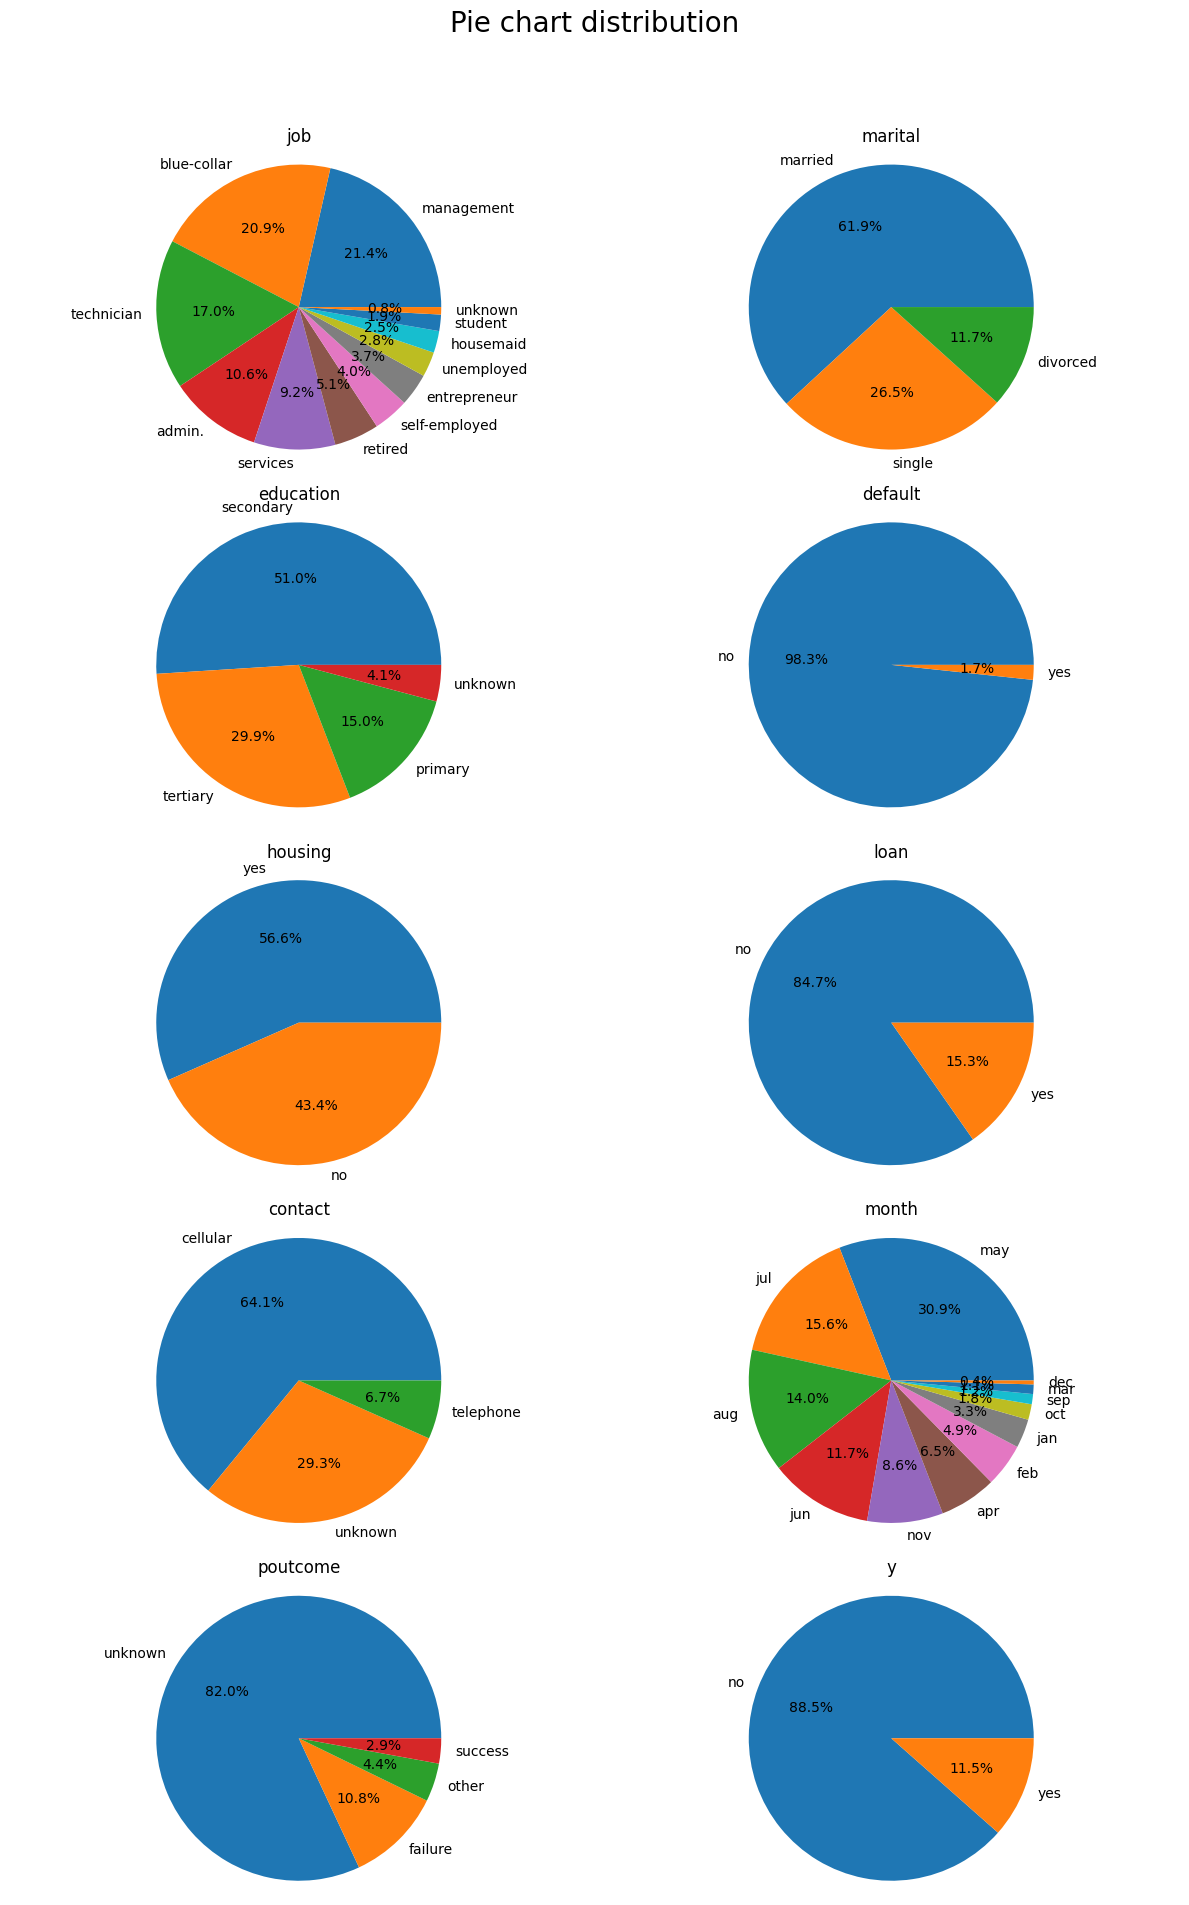

In [43]:
fig = plt.figure(figsize=(12,20))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset.shape[1]+1):
    plt.subplot(5,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset.columns.values[i-1])
    
    values = dataset.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])

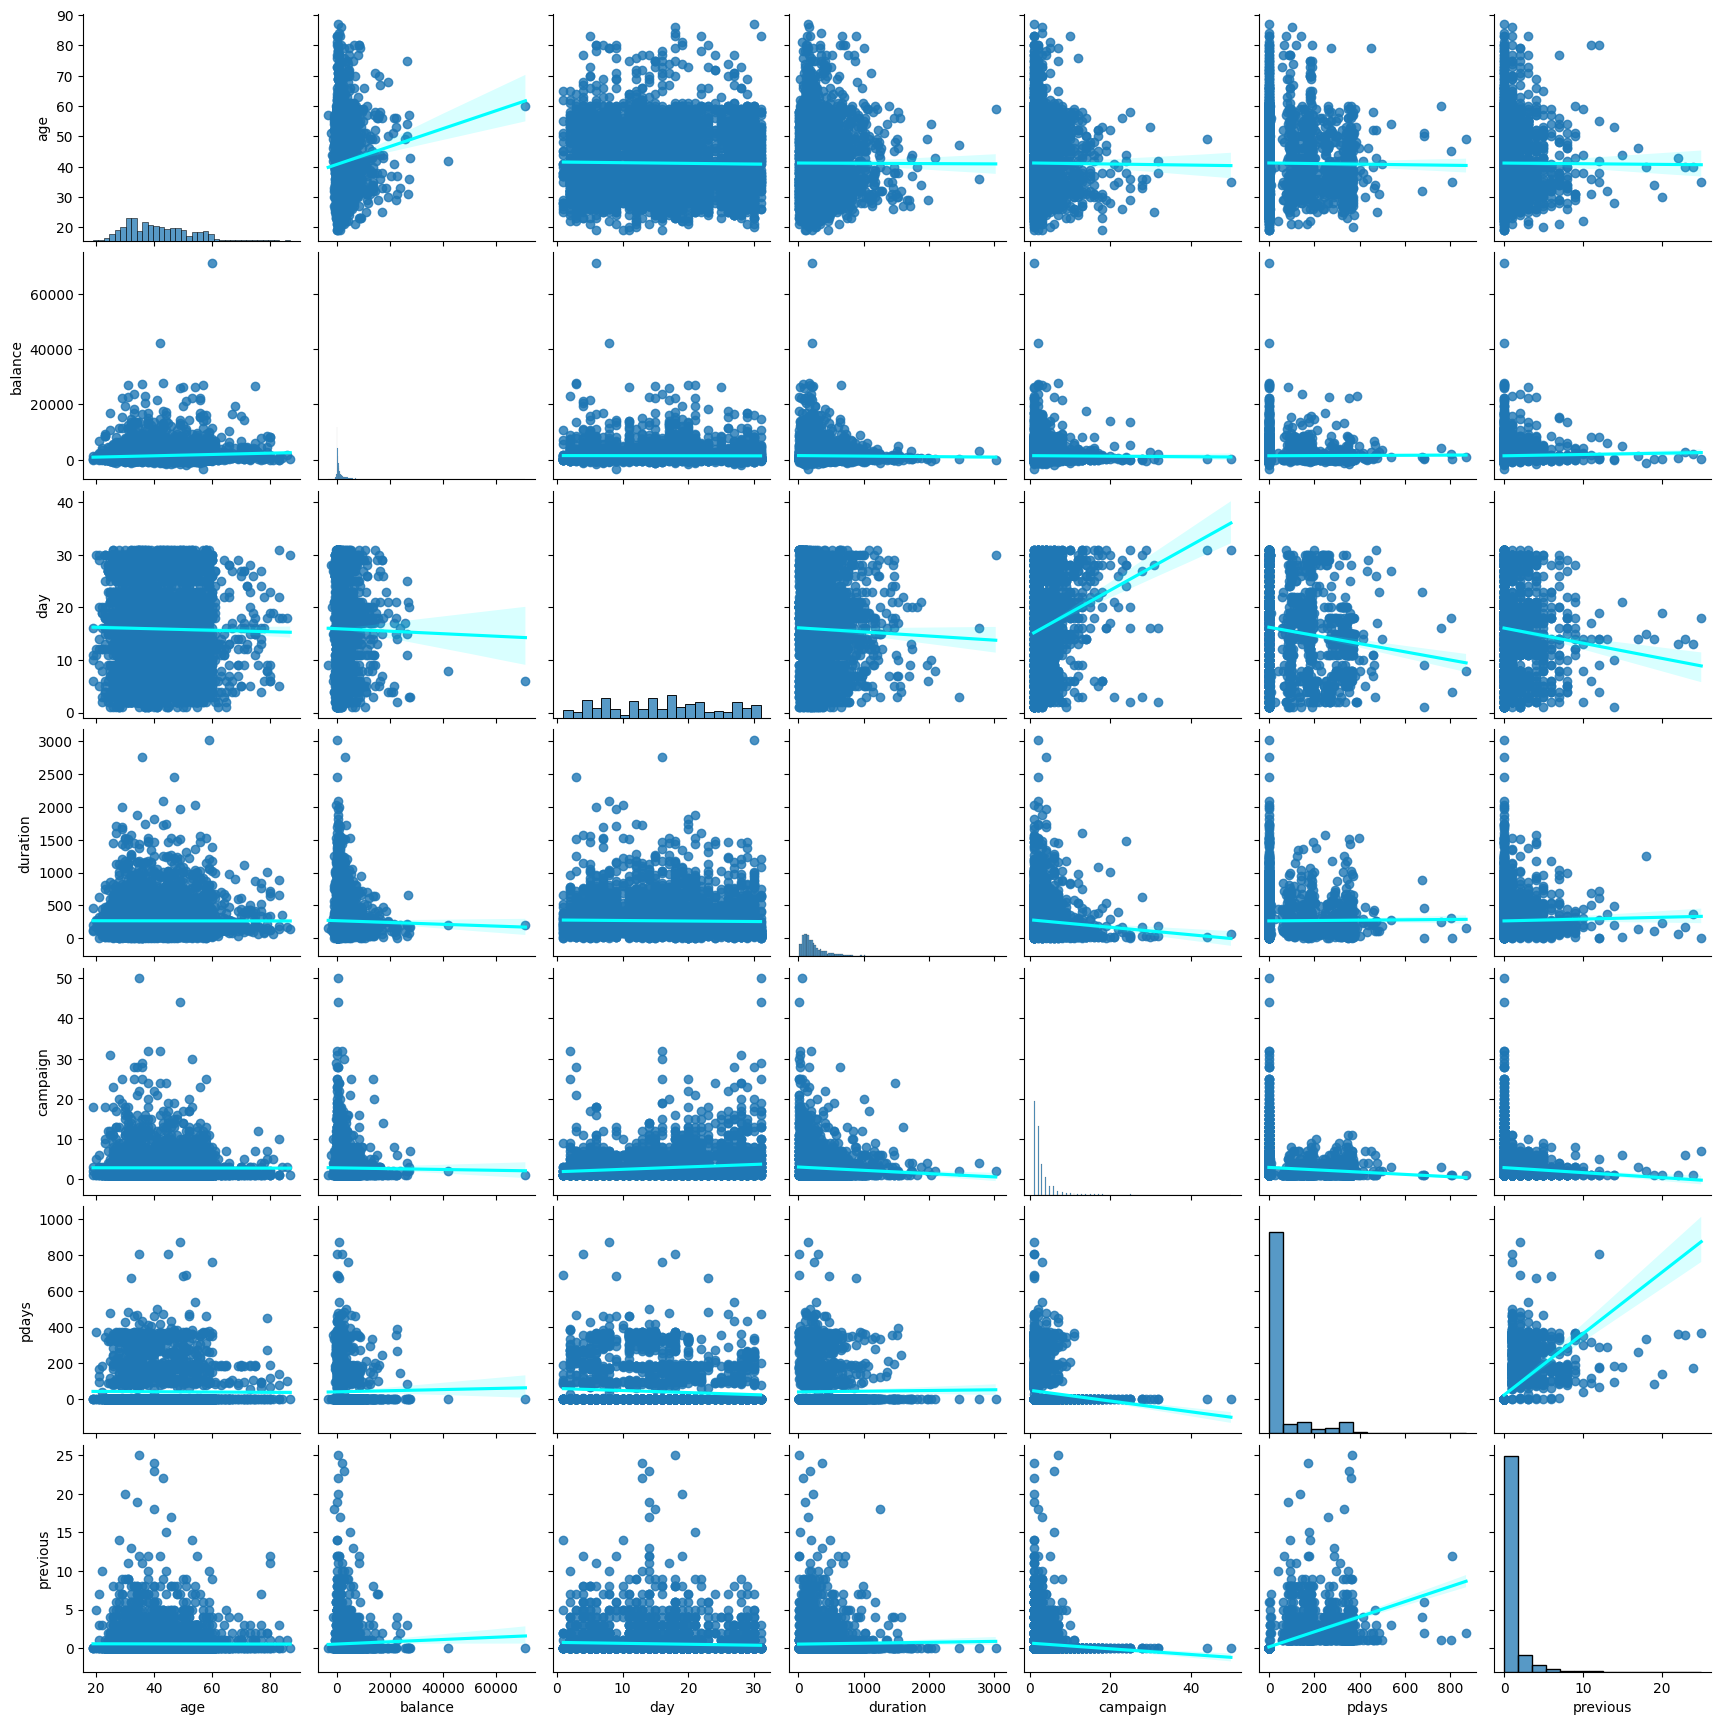

In [44]:
sns.pairplot(bank_df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Bank_full data exploration

In [45]:
bank_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [46]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
bank_full_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
bank_full_df.isna().any()
# There is not any Nan values but we have some unknown values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [49]:
dataset1 = bank_full_df.drop(columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','poutcome','y'])

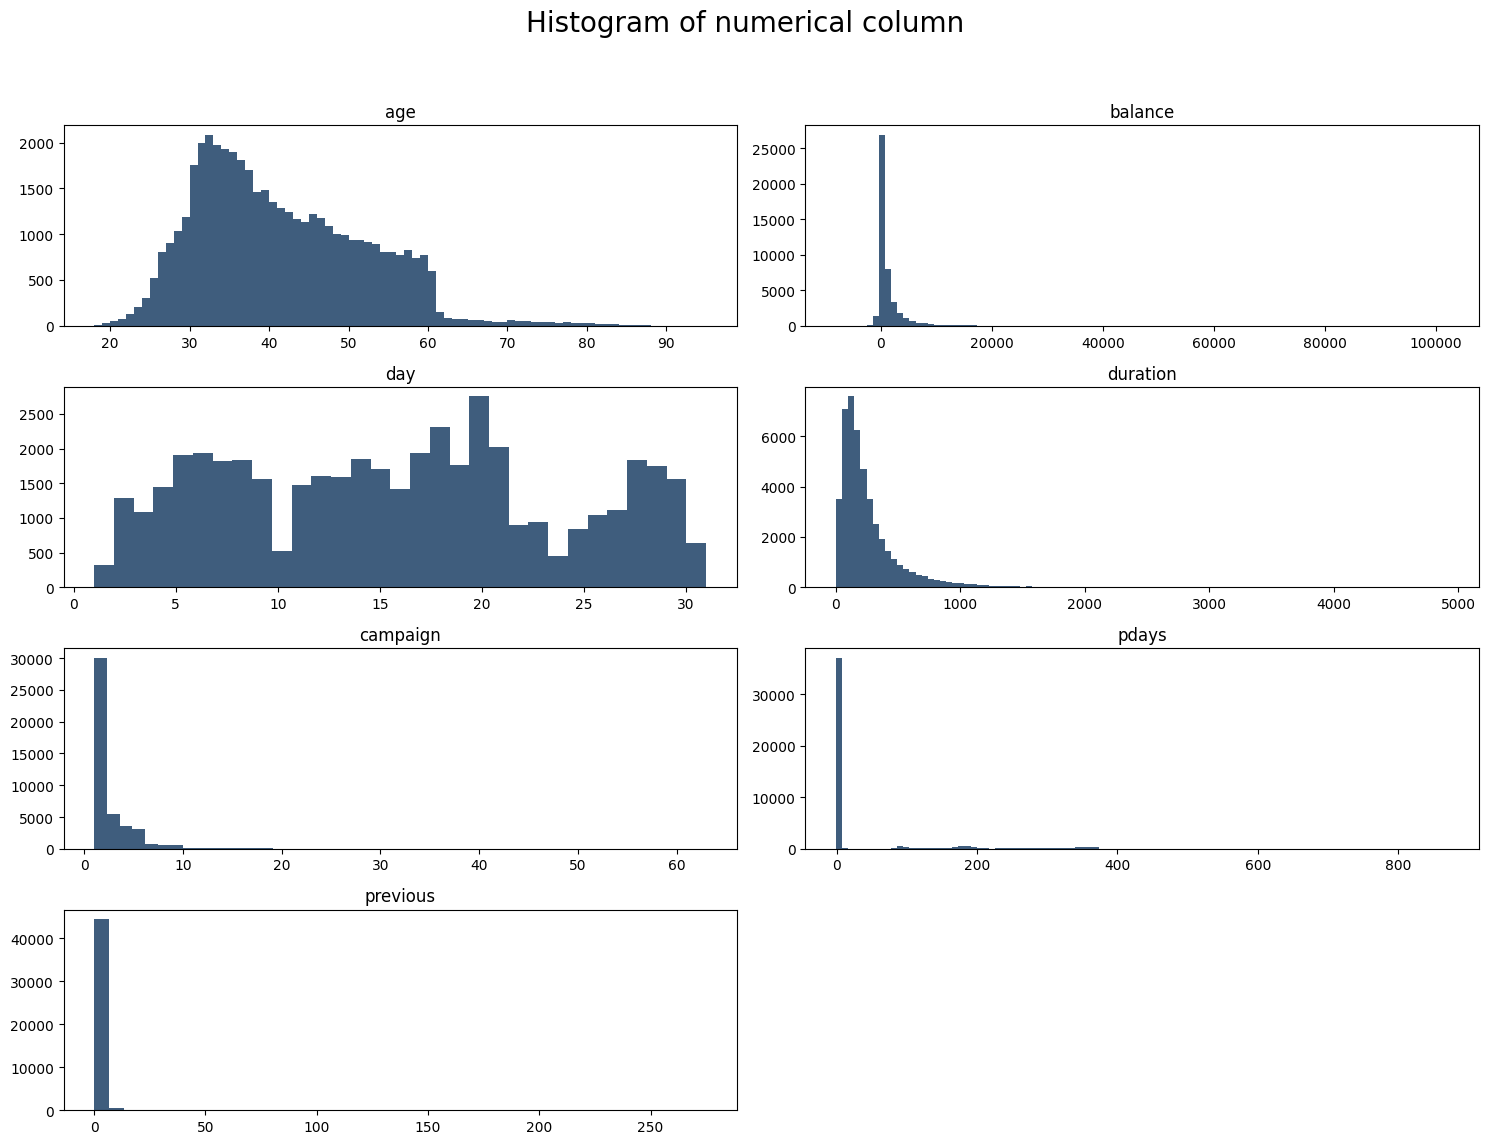

In [50]:
fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(4,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    vals = np.size(dataset1.iloc[:,i].unique())
    if vals>=100:
        vals=100
    
    plt.hist(dataset1.iloc[:,i], bins= vals, color="#3F5D7D")
    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [51]:
dataset2 = bank_full_df[['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','poutcome','y']]

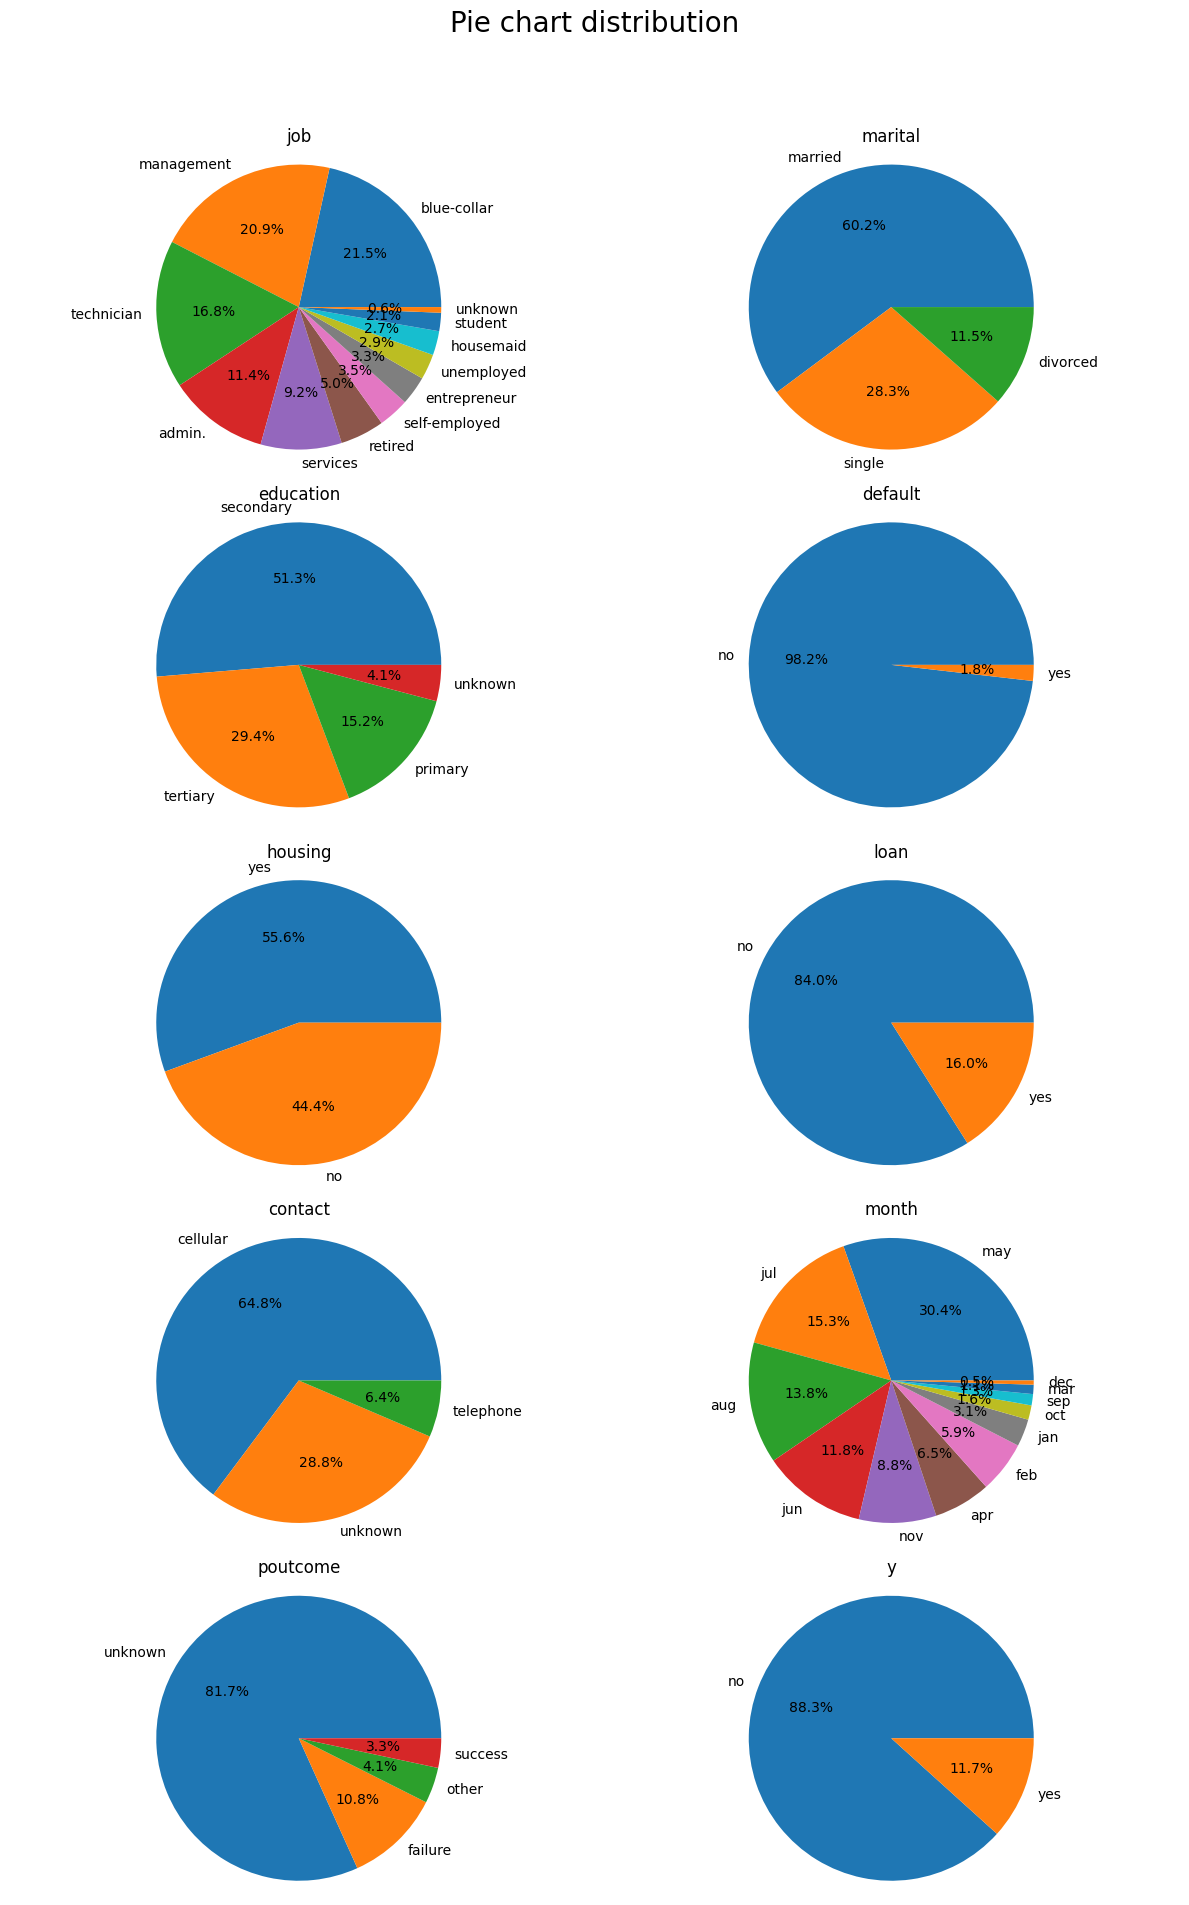

In [52]:
fig = plt.figure(figsize=(12,20))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(5,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])